In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from biaxread import *
from scipy.signal import medfilt

%matplotlib inline

In [2]:
def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    r"""Smooth (and optionally differentiate) data with a Savitzky-Golay filter.
    The Savitzky-Golay filter removes high frequency noise from data.
    It has the advantage of preserving the original shape and
    features of the signal better than other types of filtering
    approaches, such as moving averages techniques.
    Parameters
    ----------
    y : array_like, shape (N,)
        the values of the time history of the signal.
    window_size : int
        the length of the window. Must be an odd integer number.
    order : int
        the order of the polynomial used in the filtering.
        Must be less then `window_size` - 1.
    deriv: int
        the order of the derivative to compute (default = 0 means only smoothing)
    Returns
    -------
    ys : ndarray, shape (N)
        the smoothed signal (or it's n-th derivative).
    Notes
    -----
    The Savitzky-Golay is a type of low-pass filter, particularly
    suited for smoothing noisy data. The main idea behind this
    approach is to make for each point a least-square fit with a
    polynomial of high order over a odd-sized window centered at
    the point.
    Examples
    --------
    t = np.linspace(-4, 4, 500)
    y = np.exp( -t**2 ) + np.random.normal(0, 0.05, t.shape)
    ysg = savitzky_golay(y, window_size=31, order=4)
    import matplotlib.pyplot as plt
    plt.plot(t, y, label='Noisy signal')
    plt.plot(t, np.exp(-t**2), 'k', lw=1.5, label='Original signal')
    plt.plot(t, ysg, 'r', label='Filtered signal')
    plt.legend()
    plt.show()
    References
    ----------
    .. [1] A. Savitzky, M. J. E. Golay, Smoothing and Differentiation of
       Data by Simplified Least Squares Procedures. Analytical
       Chemistry, 1964, 36 (8), pp 1627-1639.
    .. [2] Numerical Recipes 3rd Edition: The Art of Scientific Computing
       W.H. Press, S.A. Teukolsky, W.T. Vetterling, B.P. Flannery
       Cambridge University Press ISBN-13: 9780521880688
    """
    import numpy as np
    from math import factorial

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [3]:
def dc_disp(disp):
    return np.exp(-0.33*disp)*70 + 5

def amb_disp(disp):
    return np.exp(disp*-0.23)*0.5 -0.003

In [4]:
# Path to folders of biax data
data_path = '/Users/jleeman/Dropbox/PennState/BiaxExperiments'
#p4309 = ReadAscii(data_path + '/p4309/p4309_data.txt')
#p4309 = p4309[211642:220000]
#p4309 = p4309[95564:99876]

# These are the "Tableau 20" colors as RGB.
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

df = pd.read_excel('p4309_rsf_fits.xlsx')

data = df[df['Law']=='r']
data = data[data['k']==0.0055]
data =  data.query('Grade == ["A","B"]')

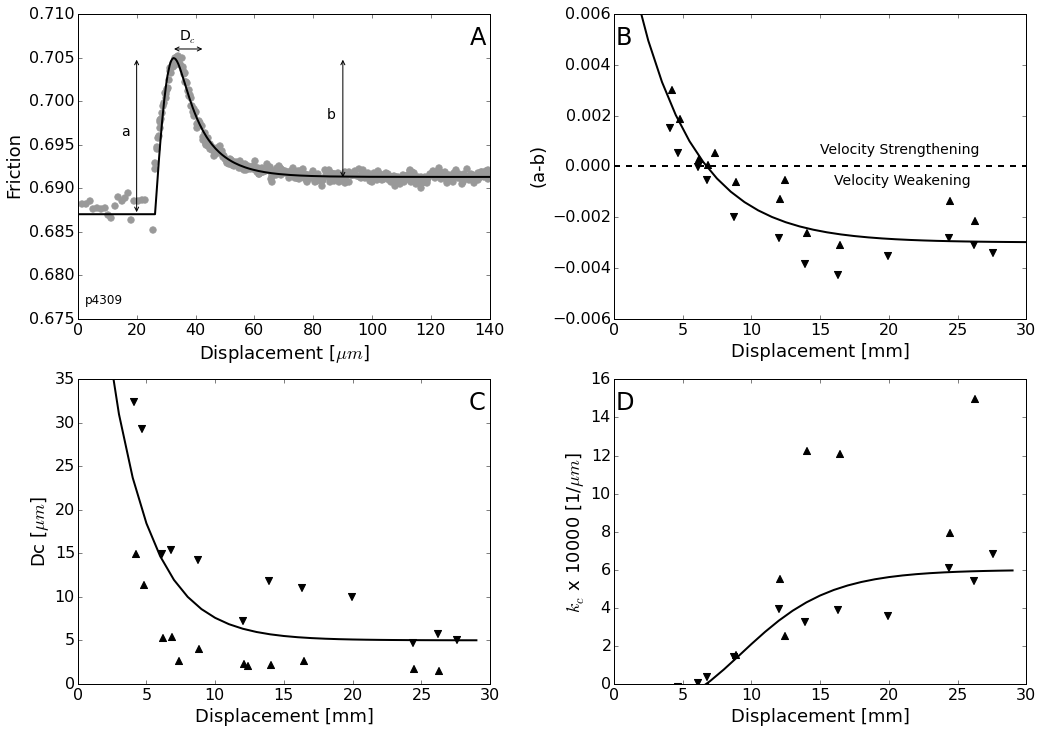

In [12]:
# Setup figure and axes
# Generally plots is ~1.33x width to height (10,7.5 or 12,9)
fig = plt.figure(figsize=(17,12))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

plt.subplots_adjust(wspace=0.3)
#fig.subplots_adjust(hspace=0.1, wspace=0.35)

#
# Velocity Step Plot
#

# Label Plot
ax1.text(0.95,0.9,'A',transform = ax1.transAxes,fontsize=24)
ax1.text(0.02,0.05,'p4309',transform = ax1.transAxes,fontsize=12)

# Set labels and tick sizes
ax1.set_xlabel(r'Displacement [$\mu m$]',fontsize=18)
ax1.set_ylabel(r'Friction',fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=16)

# Turns off chart clutter

# Turn off top and right tick marks
# ax1.get_xaxis().tick_bottom()
# ax1.get_yaxis().tick_left()

# Turn off top and right splines
# ax1.spines["top"].set_visible(False)
# ax1.spines["right"].set_visible(False)

#ax1.plot(p4309['LP_Disp'] - p4309['LP_Disp'][0],savitzky_golay(np.ravel(p4309['mu']),201,5),color='k',linewidth=1,
#        label='p4309')

p4309 = np.loadtxt('step_35_model.txt',skiprows=5,usecols=[1,8,10])

p4309_mu_downsampled = p4309[:,1][7:]
p4309_mu_downsampled = p4309_mu_downsampled.reshape((60,10))
p4309_mu_downsampled = np.mean(p4309_mu_downsampled,axis=1)

p4309_disp_downsampled = p4309[:,0]-p4309[0,0]
p4309_disp_downsampled = p4309_disp_downsampled[7:].reshape((60,10))
p4309_disp_downsampled = np.mean(p4309_disp_downsampled,axis=1)

# row 215 to end for high velocity, 0-19 for red
ax1.scatter(p4309[215:,0]-p4309[0,0],p4309[215:,1],color='0.6',s=40, label='p4309 Data')
ax1.scatter(p4309_disp_downsampled[0:19], p4309_mu_downsampled[0:19], color='0.6',s=40, label='p4309 Data')
ax1.plot(p4309[:,0]-p4309[0,0],p4309[:,2],color='k',linewidth=2, label='p4309 Model')

# Add "a" arrow
arrow_x = [20,20]
arrow_y = [0.687,0.705]
ax1.annotate('', xy=(arrow_x[0], arrow_y[0]), xycoords='data',xytext=(arrow_x[1], arrow_y[1]), textcoords='data',arrowprops={'arrowstyle': '<->'})
ax1.text(arrow_x[0]-5,np.mean(arrow_y),'a',fontsize=14)

# Add "b" arrow
arrow_x = [90,90]
arrow_y = [0.705,0.691]
ax1.annotate('', xy=(arrow_x[0], arrow_y[0]), xycoords='data',xytext=(arrow_x[1], arrow_y[1]), textcoords='data',arrowprops={'arrowstyle': '<->'})
ax1.text(arrow_x[0]-5,np.mean(arrow_y),'b',fontsize=14)

# Add "Dc" arrow
arrow_x = [32,43]
arrow_y = [0.706,0.706]
ax1.annotate('', xy=(arrow_x[0], arrow_y[0]), xycoords='data',xytext=(arrow_x[1], arrow_y[1]), textcoords='data',arrowprops={'arrowstyle': '<->'})
ax1.text(np.mean(arrow_x)-3,arrow_y[0]+0.001,r'D$_c$',fontsize=14)


ax1.set_ylim(0.675,0.71)
ax1.set_xlim(0,140)

#
# Left Plot of a-b
#

# Label Plot
ax2.text(0.01,0.9,'B',transform = ax2.transAxes,fontsize=24)

# Set labels and tick sizes
ax2.set_xlabel(r'Displacement [mm]',fontsize=18)
ax2.set_ylabel(r'(a-b)',fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=16)

# Turns off chart clutter

# Turn off top and right tick marks
# ax2.get_xaxis().tick_bottom()
# ax2.get_yaxis().tick_left()

# Turn off top and right splines
# ax2.spines["top"].set_visible(False)
# ax2.spines["right"].set_visible(False)

# Plotting
up = data[data['Type']=='Up']
ax2.scatter(up['LP_Disp']/1000,(up['a']-up['b']),color='k',
            s=50,marker='^', label='Velocity Step Up')

down = data[data['Type']=='Down']
ax2.scatter(down['LP_Disp']/1000,(down['a']-down['b']),color='k',
            s=50,marker='v', label='Velocity Step Down')

ax2.axhline(y=0,color='k',linewidth='2',linestyle='--')

# Label velocity regions
ax2.text(15,0.0005,'Velocity Strengthening',fontsize=14)
ax2.text(16,-0.0007,'Velocity Weakening',fontsize=14)

ax2.set_ylim(-0.006 ,0.006)

#
# Right Plot of Dc
#

# Label Plot
ax3.text(0.95,0.9,'C',transform = ax3.transAxes,fontsize=24)

# Set labels and tick sizes
ax3.set_xlabel(r'Displacement [mm]',fontsize=18)
ax3.set_ylabel(r'Dc [$\mu m$]',fontsize=18)
ax3.tick_params(axis='both', which='major', labelsize=16)

# Turns off chart clutter

# Turn off top and right tick marks
# ax3.get_xaxis().tick_bottom()
# ax3.get_yaxis().tick_left()

# Turn off top and right splines
# ax3.spines["top"].set_visible(False)
# ax3.spines["right"].set_visible(False)

# Plotting
up = data[data['Type']=='Up']
ax3.scatter(up['LP_Disp']/1000,up['Dc'],color='k',
            s=50,marker='^', label='Velocity Step Up')

down = data[data['Type']=='Down']
ax3.scatter(down['LP_Disp']/1000,down['Dc'],color='k',
            s=50,marker='v', label='Velocity Step Down')

ax3.set_ylim(0.0,35)

#
# Kc
#

# Label Plot
ax4.text(0.01,0.9,'D',transform = ax4.transAxes,fontsize=24)

# Set labels and tick sizes
ax4.set_xlabel(r'Displacement [mm]',fontsize=18)
ax4.set_ylabel(r'$k_c$ x 10000 [1/$\mu m$]',fontsize=18)
ax4.tick_params(axis='both', which='major', labelsize=16)

# Turns off chart clutter

# Turn off top and right tick marks
# ax3.get_xaxis().tick_bottom()
# ax3.get_yaxis().tick_left()

# Turn off top and right splines
# ax3.spines["top"].set_visible(False)
# ax3.spines["right"].set_visible(False)

# Plotting
up = data[data['Type']=='Up']
kc = 10000*(up['b']-up['a'])/up['Dc']
ax4.scatter(up['LP_Disp']/1000,kc,color='k',
            s=50,marker='^', label='Velocity Step Up')

down = data[data['Type']=='Down']
kc = 10000*(down['b']-down['a'])/down['Dc']
ax4.scatter(down['LP_Disp']/1000,kc,color='k',
            s=50,marker='v', label='Velocity Step Down')

ax4.set_ylim(0.0,16)
ax4.set_xlim(0,30)

### TRY FUN WITH DC FITTING
x = np.arange(1,30)
y = np.exp(-0.33*x)*70 + 5
ax3.plot(x,y,color='k',linewidth=2)
ax3.set_xlim(0,30)

x2 = np.arange(1,50)
y2 = np.exp(-x2*0.23)*0.5 -0.003
x2 = x2 - 15.5
ax2.plot(x2,y2,color='k',linewidth=2)
ax2.set_xlim(0,30)

x3 = np.arange(1,30)
amb = amb_disp(x3+15.5)
dcs = dc_disp(x3)
y3 = -1.*amb/dcs
ax4.plot(x3,y3*10000,color='k',linewidth=2)

plt.savefig('RSF_Parameters.png', bbox_inches="tight")
#plt.show()
